In [36]:
import numpy as np
import matplotlib.pyplot as plt

In [37]:
from sklearn.datasets import load_iris

In [38]:
iris = load_iris()

In [39]:
A = iris.data

In [40]:
n = iris.data.shape[0]
d = iris.data.shape[1]

In [41]:
y = 1.0*np.ones([A.shape[0],])

In [42]:
for i in range(iris.target.shape[0]):
  if iris.target[i] != 1:
    y[i] = -1

In [43]:
indexarr = np.arange(n)
np.random.shuffle(indexarr)

In [44]:
print(indexarr)

[ 89  10 126 131  92 135 144 130  78 132  25  23  27 105 115  54  24  31
  63  11  83 128  77 146 143 124  26  70   0  57  28 111 120   6  49  30
 109 147  69  51  95  37 119  36 118  59  29 103  60  97  34  72  38  20
 140 114  62  43 136 141  15  86  41 107   3 108  99  94  98  61  42   7
  58  66  53 104 139  93  40  74  39  85 101 121 106  47  13   4  81  91
 149  84  44  56 100 138  79   8  17  12  68  52  14  16 116 133  82 129
 127 142 145  19 134  21 112   9  22  32  87  88  46   2   1  75  73 148
  45  48  71 117   5  18  80  35  76  33  96 137  67  65  90  64  50 102
 110 113  55 122 123 125]


In [45]:
train_data = np.ones([int(len(indexarr)*0.8),A.shape[1]])

In [46]:
for i in range(int(len(indexarr)*0.8)):
  train_data[i] = A[indexarr[i]]

In [47]:
test_data = np.ones([int(len(indexarr)*0.2),A.shape[1]])

for i in range(int(len(indexarr)*0.2)):
  test_data[i] = A[indexarr[i + int(len(indexarr)*0.8)]]

In [48]:
train_label = np.ones([int(len(indexarr)*0.8),])

In [49]:
for i in range(int(len(indexarr)*0.8)):
  train_label[i] = y[indexarr[i]]

In [50]:
test_label = np.ones([int(len(indexarr)*0.2),])

for i in range(int(len(indexarr)*0.2)):
  test_label[i] = y[indexarr[i + int(len(indexarr)*0.8)]]

In [51]:
def predict(w, x):
  if np.matmul(w.transpose(),x)<0:
    return -1
  else:
    return 1

In [52]:
def compute_accuracy(data, labels, model_w):
  no_correct = 0
  for i in range(len(labels)):
    if predict(model_w, data[i]) == labels[i]:
      no_correct += 1
  return no_correct/len(labels)

In [53]:
def compute_orthogonal_projection(z):
  sum = 0
  for i in z:
    sum += abs(i)
  k = (sum-1)/2
  arr = np.ones(len(z))
  for i in range(len(z)):
    if z[i] > k:
      arr[i] = z[i] - k
    elif z[i] < -k:
      arr[i] =  z[i] + k
    else:
      arr[i] =  0
  return arr

In [54]:
def compute_loss_h(w, x, y):
  return max(0, 1 - np.multiply(y,np.matmul(w.transpose(),x)))

In [55]:
def compute_objfnval(data, labels, model_w, lamda):
  sum = 0
  for i in range(len(labels)):
    sum += compute_loss_h(model_w, data[i], labels[i])
  sum = sum/len(labels)
  sum += (lamda/2)*(np.linalg.norm(model_w))**2
  return sum

In [56]:
def compute_grad_loss_h(x, y, model_w, lamda):
  n = len(model_w)
  arr = np.ones(n)
  for i in range(n):
    if compute_loss_h(model_w, x, y) != 0:
      arr[i] = (lamda/n)*model_w[i] - y*x[i]
    else:
      arr[i] = (lamda/n)*model_w[i]
  return arr

In [57]:
def OPT1(data, label, lamda, num_epochs):
  t = 1
  obj_fn = []
  accuracy_test = []
  accuracy_train = []
  w = np.ones(data.shape[1])
  arr = np.arange(data.shape[0])
  for epoch in range(num_epochs):
    np.random.shuffle(arr)
    for i in np.nditer(arr):
      step = 1/t
      w = compute_orthogonal_projection(w - np.multiply(step, compute_grad_loss_h(data[i], label[i], w, lamda)))
      t = t + 1
      if t > 1e4:
        t = 1
    obj_fn.append(compute_objfnval(data, label, w, lamda))
    accuracy_test.append(compute_accuracy(test_data, test_label, w))
    accuracy_train.append(compute_accuracy(train_data, train_label, w))
  return w, accuracy_test, accuracy_train, obj_fn

In [58]:
num_epochs = 1000
lamdas = [1e-3,1e-2,0.1,1,10]
x_epochs = [i for i in range(1,1001)]
obj_fnval_list = []
accuracy_train_list = []
accuracy_test_list = []
final_accuracy_test = []
final_accuracy_train = []

for i in lamdas:
  model_w, acc_test, acc_train, obj_fnval = OPT1(train_data, train_label, i, num_epochs)
  obj_fnval_list.append(obj_fnval)
  accuracy_train_list.append(acc_train)
  accuracy_test_list.append(acc_test)
  final_accuracy_test.append(compute_accuracy(test_data, test_label, model_w))
  final_accuracy_train.append(compute_accuracy(train_data, train_label, model_w))

#Ans 4(a) Plot of objective function values for different values of lambda

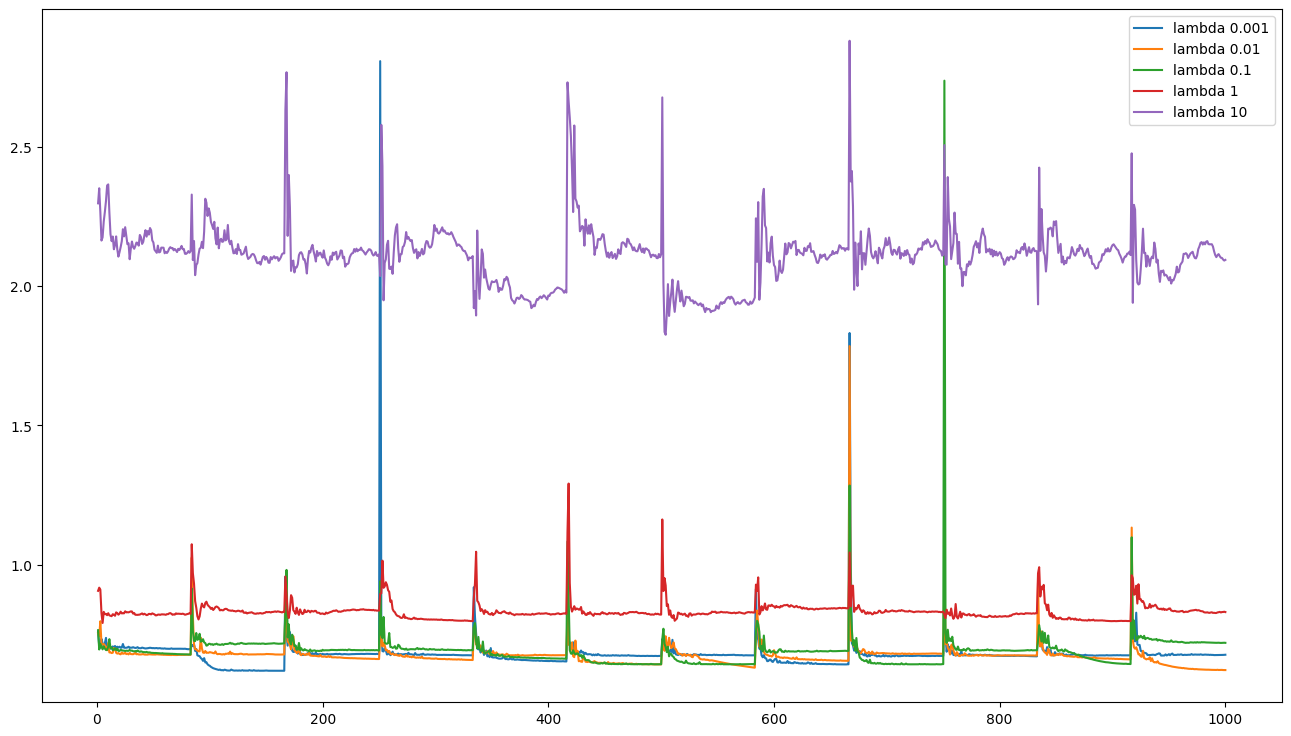

In [59]:
plt.figure(figsize = (16,9))
for i in range(len(obj_fnval_list)):
  plt.plot(x_epochs, obj_fnval_list[i], label = 'lambda '+str(lamdas[i]))
plt.legend()
plt.show()

#Ans 4(b) Plot of test set accuracy values for different values of lambda

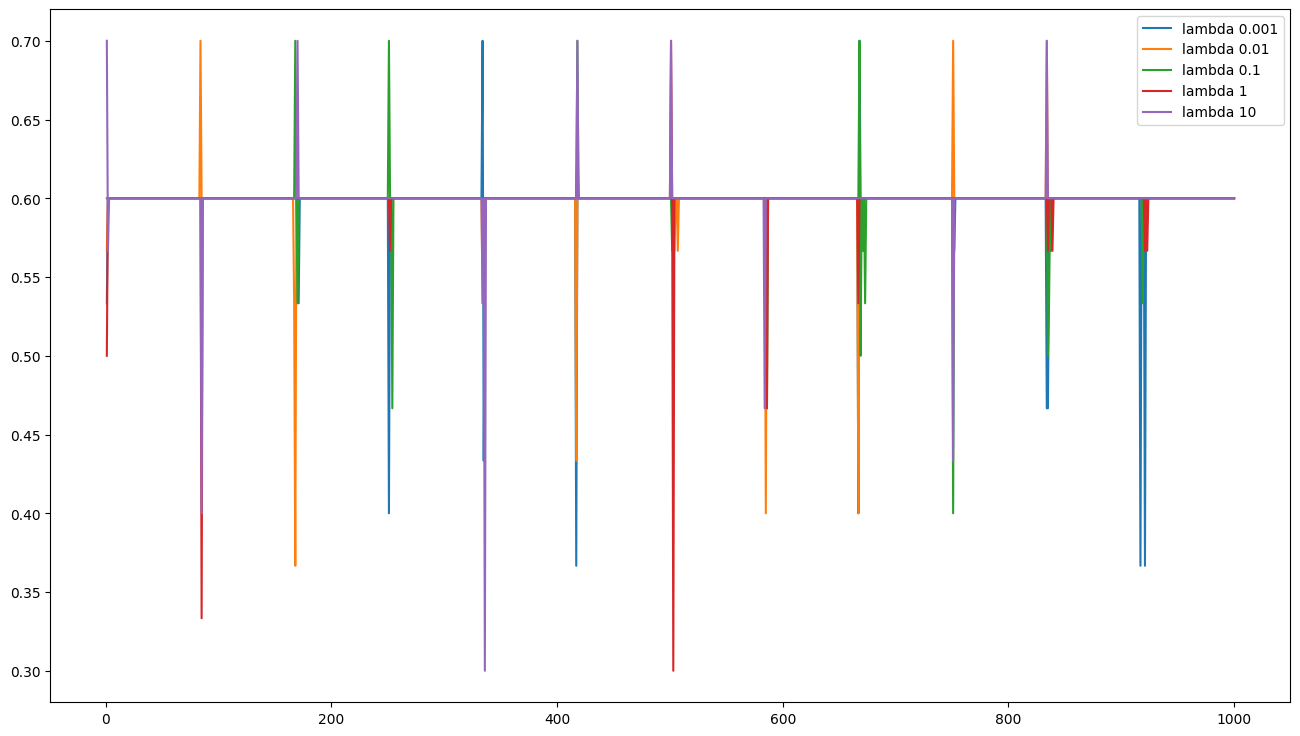

In [60]:
plt.figure(figsize = (16,9))
for i in range(len(accuracy_test_list)):
  plt.plot(x_epochs, accuracy_test_list[i], label = 'lambda '+str(lamdas[i]))
plt.legend()
plt.show()

#Ans 4(c) Plot of train set accuracy values for different values of lambda

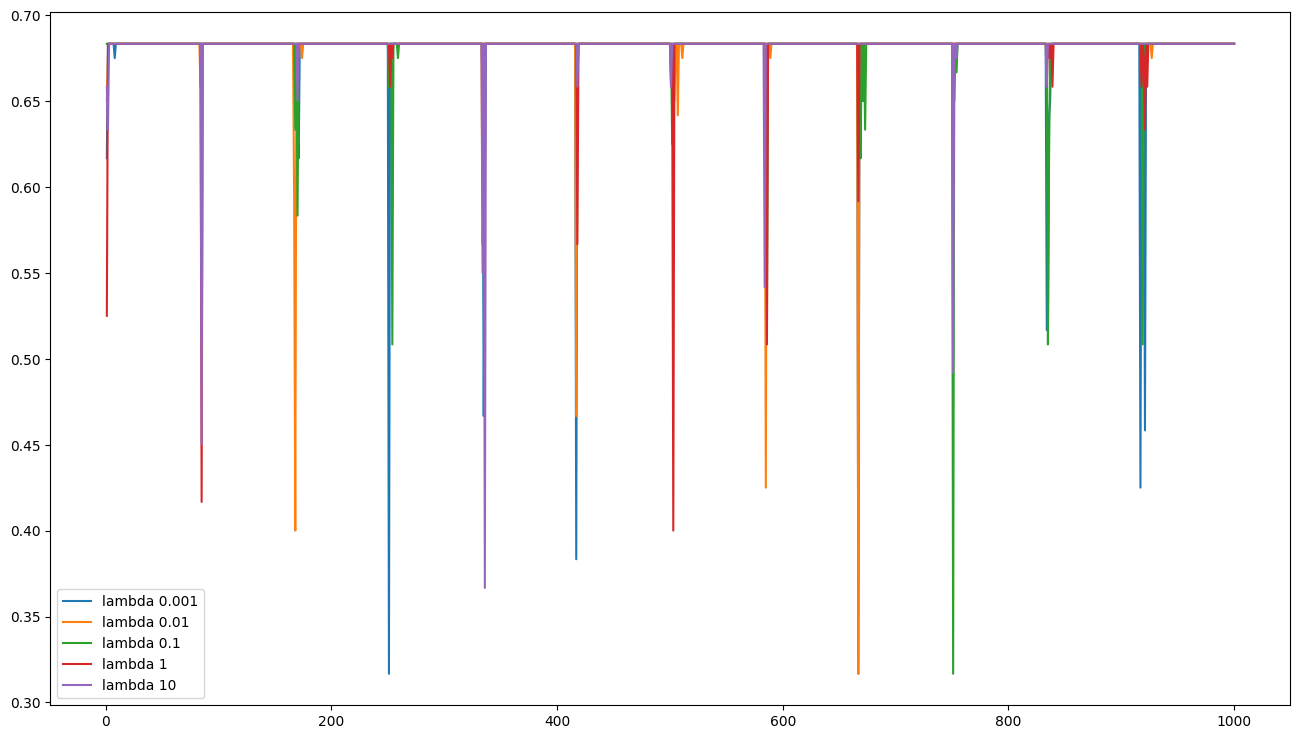

In [61]:
plt.figure(figsize = (16,9))
for i in range(len(accuracy_train_list)):
  plt.plot(x_epochs, accuracy_train_list[i], label = 'lambda '+str(lamdas[i]))
plt.legend()
plt.show()

In [62]:
final_accuracy_train

[0.6833333333333333,
 0.6833333333333333,
 0.6833333333333333,
 0.6833333333333333,
 0.6833333333333333]

In [63]:
final_accuracy_test

[0.6, 0.6, 0.6, 0.6, 0.6]

#Ans 4 (d)

Train set accuracy values:

For lambda = 1e-3, 0.683

For lambda = 1e-2, 0.683

For lambda = 0.1, 0.683

For lambda = 1, 0.683

For lambda = 10, 0.683

Test set accuracy values:

For lambda = 1e-3, 0.6

For lambda = 1e-2, 0.6

For lambda = 0.1, 0.6

For lambda = 1, 0.6

For lambda = 10, 0.6

#Ans 4(e)

We can see that the curves for all values of lambda are very squiggly in nature and increases rapidly for the largest epoch i.e. 1000th. We can see that for lamda = 0.1, 1,as for every lambda accuracy is same

One more observation that has been made is the accuracy changes with every random split of data.**bold text**

#Loss Function, $L_l$

In [64]:
def compute_loss_l(w, x, y):
  return np.log(1 + np.exp(np.multiply(-y, np.matmul(w.transpose(), x))))

In [65]:
def compute_objfnval(data, labels, model_w, lamda):
  sum = 0
  for i in range(len(labels)):
    sum += compute_loss_l(model_w, data[i], labels[i])
  sum = sum/len(labels)
  sum += (lamda/2)*(np.linalg.norm(model_w))**2
  return sum

In [66]:
def compute_grad_loss_l(x, y, model_w, lamda):
  n = len(model_w)
  arr = np.ones(n)
  for i in range(n):
    arr[i] = (lamda/n)*model_w[i] + np.divide((np.multiply((np.exp(np.multiply(-y,np.matmul(model_w,x)))),np.multiply(-y,x[i]))), 1 + (np.exp(np.multiply(-y,np.matmul(model_w,x)))))
  return arr

In [67]:
def OPT2(data, label, lamda, num_epochs):
  t = 1
  obj_fn = []
  accuracy_test = []
  accuracy_train = []
  w = np.ones(data.shape[1])
  arr = np.arange(data.shape[0])
  for epoch in range(num_epochs):
    np.random.shuffle(arr)
    for i in np.nditer(arr):
      step = 1/t
      w = w - np.multiply(step, compute_grad_loss_l(data[i], label[i], w, lamda))
      t = t + 1
      if t > 1e4:
        t = 1
    obj_fn.append(compute_objfnval(data, label, w, lamda))
    accuracy_test.append(compute_accuracy(test_data, test_label, w))
    accuracy_train.append(compute_accuracy(train_data, train_label, w))
  return w, accuracy_test, accuracy_train, obj_fn

In [68]:
num_epochs = 1000
lamdas = [1e-3,1e-2,0.1,1,10]
x_epochs = [i for i in range(1,1001)]
obj_fnval_list = []
accuracy_train_list = []
accuracy_test_list = []
final_accuracy_test = []
final_accuracy_train = []

for i in lamdas:
  model_w, acc_test, acc_train, obj_fnval = OPT2(train_data, train_label, i, num_epochs)
  obj_fnval_list.append(obj_fnval)
  accuracy_train_list.append(acc_train)
  accuracy_test_list.append(acc_test)
  final_accuracy_test.append(compute_accuracy(test_data, test_label, model_w))
  final_accuracy_train.append(compute_accuracy(train_data, train_label, model_w))

#Ans 5 :

We get an increasing function of the loss hence we get an error of overflow, so logistic function cannot be applied in this case.

#Loss Function $L_{sh}$

In [69]:
def compute_loss_sh(w, x, y):
  return (max(0, 1 - np.multiply(y, np.matmul(w.transpose(), x)))**2)

In [70]:
def compute_objfnval(data, labels, model_w, lamda):
  sum = 0
  for i in range(len(labels)):
    sum += compute_loss_sh(model_w, data[i], labels[i])
  sum = sum/len(labels)
  sum += (lamda/2)*(np.linalg.norm(model_w))**2
  return sum

In [71]:
def compute_grad_loss_sh(x, y, model_w, lamda):
  n = len(model_w)
  arr = np.ones(n)
  for i in range(n):
    if compute_loss_sh(model_w, x, y) != 0:
      arr[i] = (lamda/n)*model_w[i] + np.multiply(-2*y*x[i],max(0, 1 - np.multiply(y, np.matmul(model_w.transpose(), x))))
    else:
      arr[i] = (lamda/n)*model_w[i]
  return arr

In [72]:
def OPT3(data, label, lamda, num_epochs):
  t = 1
  obj_fn = []
  accuracy_test = []
  accuracy_train = []
  w = np.ones(data.shape[1])
  arr = np.arange(data.shape[0])
  for epoch in range(num_epochs):
    np.random.shuffle(arr)
    for i in np.nditer(arr):
      step = 1/t
      w = compute_orthogonal_projection(w - np.multiply(step, compute_grad_loss_sh(data[i], label[i], w, lamda)))
      t = t + 1
      if t > 1e4:
        t = 1
    obj_fn.append(compute_objfnval(data, label, w, lamda))
    accuracy_test.append(compute_accuracy(test_data, test_label, w))
    accuracy_train.append(compute_accuracy(train_data, train_label, w))
  return w, accuracy_test, accuracy_train, obj_fn

In [73]:
num_epochs = 1000
lamdas = [1e-3,1e-2,0.1,1,10]
x_epochs = [i for i in range(1,1001)]
obj_fnval_list = []
accuracy_train_list = []
accuracy_test_list = []
final_accuracy_test = []
final_accuracy_train = []

for i in lamdas:
  model_w, acc_test, acc_train, obj_fnval = OPT3(train_data, train_label, i, num_epochs)
  obj_fnval_list.append(obj_fnval)
  accuracy_train_list.append(acc_train)
  accuracy_test_list.append(acc_test)
  final_accuracy_test.append(compute_accuracy(test_data, test_label, model_w))
  final_accuracy_train.append(compute_accuracy(train_data, train_label, model_w))

#Ans 5.4(a) Plot of objective function values for different values of lambda

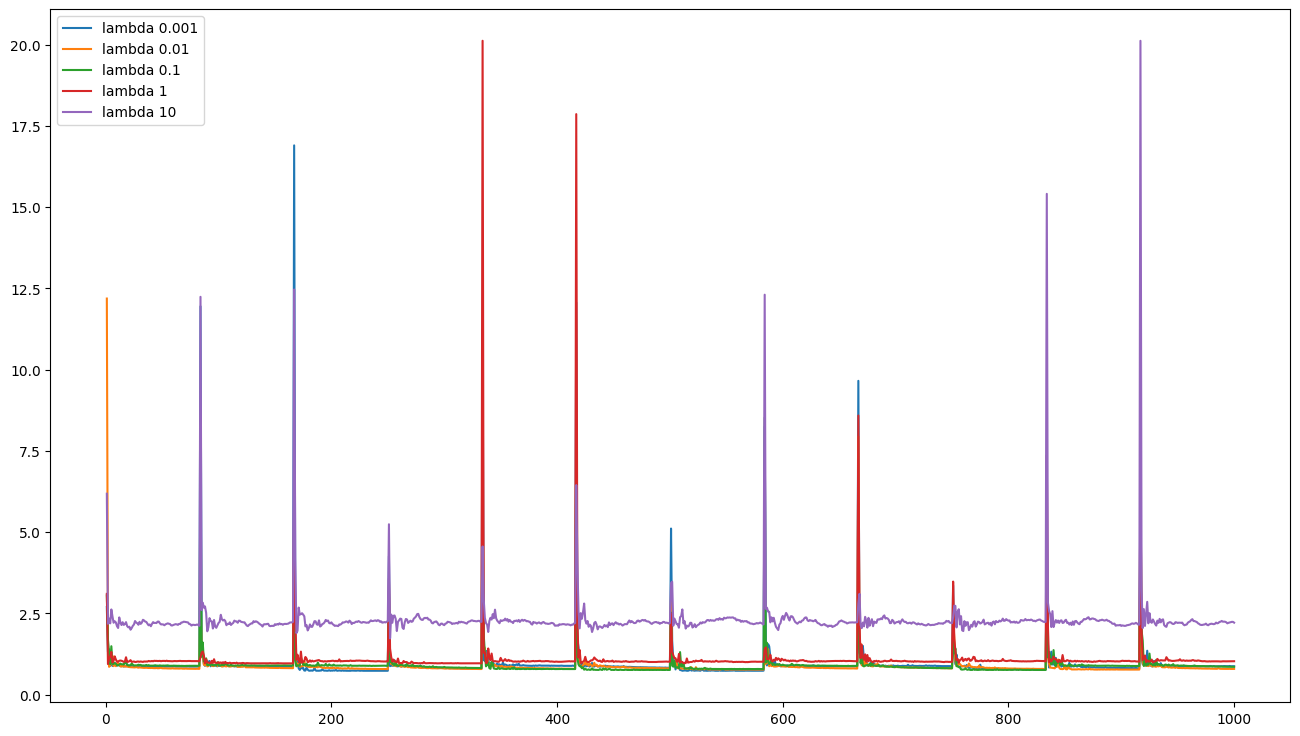

In [74]:
plt.figure(figsize = (16,9))
for i in range(len(obj_fnval_list)):
  plt.plot(x_epochs, obj_fnval_list[i], label = 'lambda '+str(lamdas[i]))
plt.legend()
plt.show()

#Ans 5.4(b) Plot of test set accuracy values for different values of lambda

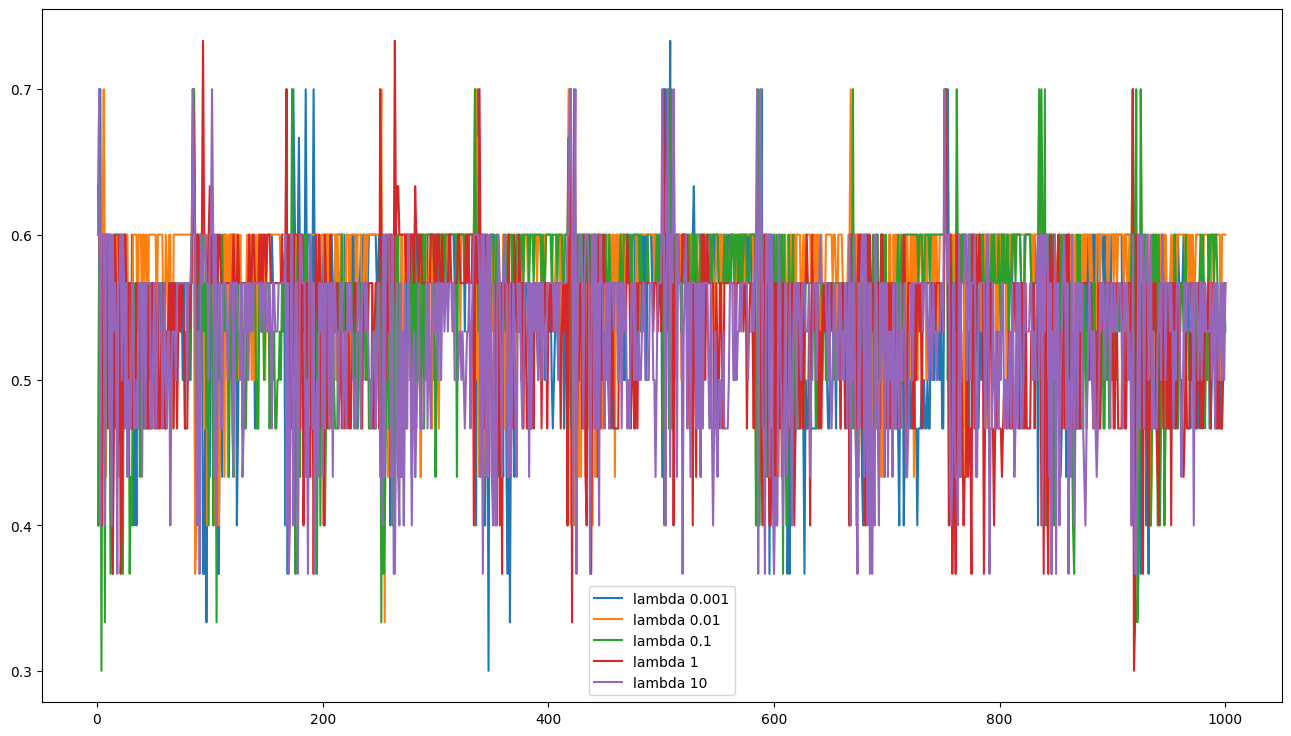

In [75]:
plt.figure(figsize = (16,9))
for i in range(len(accuracy_test_list)):
  plt.plot(x_epochs, accuracy_test_list[i], label = 'lambda '+str(lamdas[i]))
plt.legend()
plt.show()

#Ans 5.4(c) Plot of train set accuracy values for different values of lambda

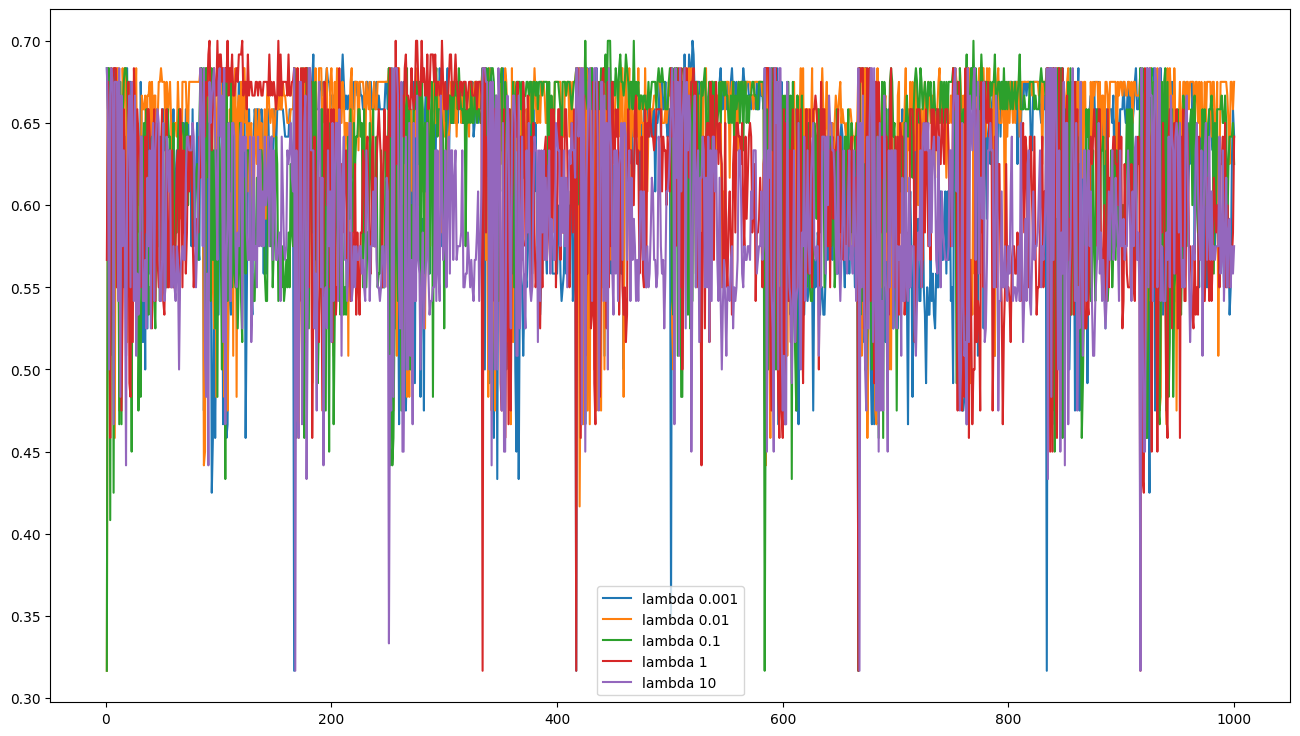

In [76]:
plt.figure(figsize = (16,9))
for i in range(len(accuracy_train_list)):
  plt.plot(x_epochs, accuracy_train_list[i], label = 'lambda '+str(lamdas[i]))
plt.legend()
plt.show()

In [77]:
final_accuracy_train

[0.6416666666666667, 0.675, 0.625, 0.6416666666666667, 0.575]

In [78]:
final_accuracy_test

[0.5666666666666667,
 0.6,
 0.5333333333333333,
 0.5666666666666667,
 0.5666666666666667]

#Ans 5.4 (d)

Train set accuracy values:

For lambda = 1e-3, 0.641

For lambda = 1e-2, 0.675

For lambda = 0.1, 0.625

For lambda = 1, 0.641

For lambda = 10, 0.572

Test set accuracy values:

For lambda = 1e-3, 0.566

For lambda = 1e-2, 0.6

For lambda = 0.1, 0.53

For lambda = 1, 0.56

For lambda = 10, 0.56

#Ans 5.4(e)

We can see that the objective function value curve rises for some lamdas at some epochs.

We can see that the accuracy curves for all values of lambda lie within a range. We can see that for the largest values of lambda except lamda = 10, we get higher accuracy value. We can also see that the test accuracy is less than train accuracy

One more observation that has been made is the accuracy changes with every random split of data.